Importing the dependencies

In [ ]:
# https://www.kaggle.com/c/titanic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data collection and processing

In [147]:
titanic_data = pd.read_csv('Titanic.csv')

In [148]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 0 -> Not Survived
- 1 -> Survived

In [149]:
titanic_data.shape

(891, 12)

In [150]:
# Getting some info about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [151]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [152]:
# No of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the missing values

In [153]:
# Drop the cabin column from the dataFrame
titanic_data = titanic_data.drop(columns= 'Cabin', axis= 1)

In [154]:
# Replacing the missing values in the Age column with mean values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace= True)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_11532\870151763.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace= True)


In [155]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [156]:
titanic_data['Embarked'].value_counts(
    
)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [157]:
titanic_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [158]:
print(titanic_data['Embarked'].mode()[0])

S


In [159]:
# Replacing the missing values in the 'Embarked' column with the mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace= True)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_11532\2231871657.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace= True)


In [160]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [161]:
# Getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [162]:
# Finding the no of people survived and not Survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Data Visualization

In [163]:
sns.set() # Give some themes to or graph

<Axes: xlabel='Survived', ylabel='count'>

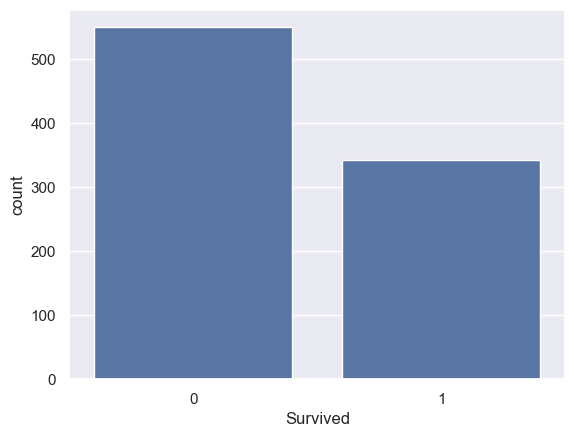

In [164]:
# Making a countplot for survived col
sns.countplot(x= 'Survived', data= titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

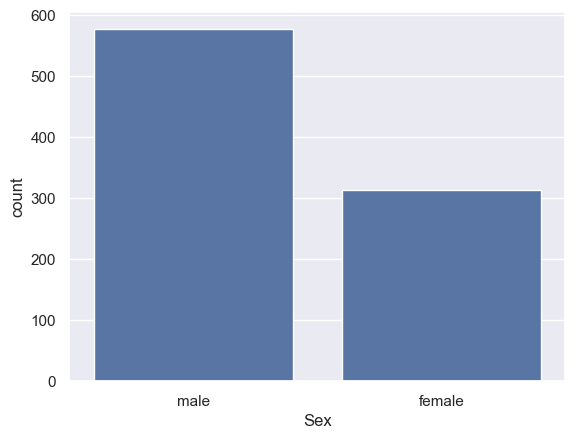

In [165]:
# Making a countplot for 'Sex' col
sns.countplot(x= 'Sex', data= titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

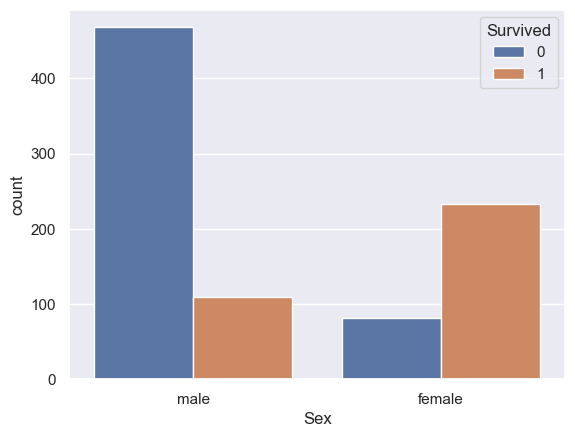

In [166]:
# Comparing the no of survivors based on their gender
sns.countplot(x= 'Sex', hue= 'Survived', data= titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

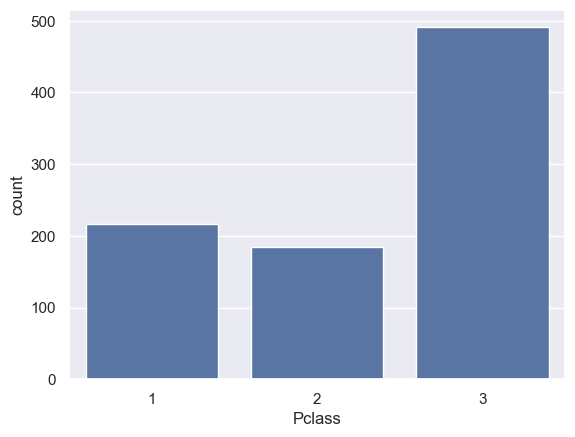

In [167]:
# Making count plot for "PClass" column
sns.countplot(x= 'Pclass', data= titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

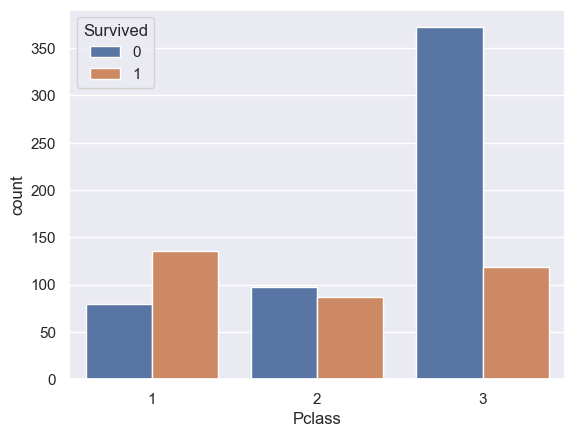

In [168]:
# Comparing the no of survivors based on their class
sns.countplot(x= 'Pclass', hue= 'Survived', data= titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

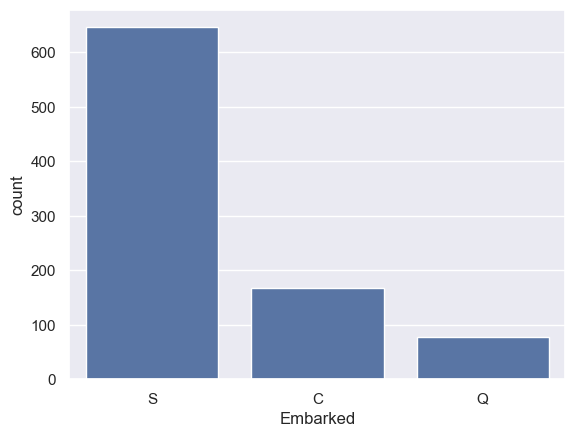

In [169]:
# Making count plot for "Embarked" column
sns.countplot(x= 'Embarked', data= titanic_data)

<Axes: xlabel='Embarked', ylabel='count'>

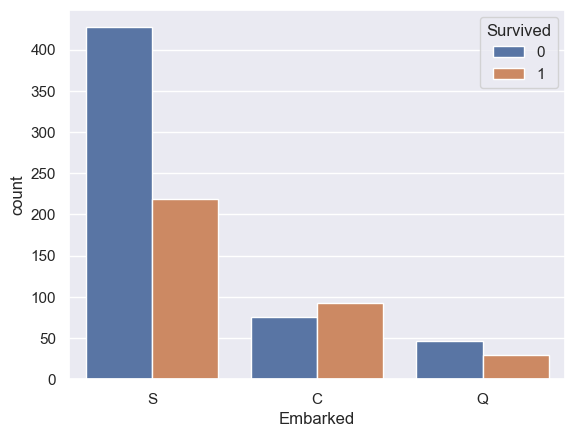

In [170]:
# Comparing the no of survivors based on their Port
sns.countplot(x= 'Embarked', hue= 'Survived', data= titanic_data)

Encoding the Categorical columns


In [171]:
titanic_data.replace({'Sex' : {'male' : 0, 'female' : 1}, 'Embarked' : {'S' : 0, 'C' : 1, 'Q' : 2}}, inplace=True)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_11532\3435051724.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace({'Sex' : {'male' : 0, 'female' : 1}, 'Embarked' : {'S' : 0, 'C' : 1, 'Q' : 2}}, inplace=True)


In [172]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [173]:
# Drop PassengerID, Name and Ticket because these cols are not that significant
titanic_data.drop(columns= ['PassengerId', 'Name'], inplace= True) 

In [174]:
titanic_data.drop(columns= 'Ticket', inplace= True)

Separating features and targets

In [175]:
X = titanic_data.drop(columns= 'Survived', axis= 1)
Y = titanic_data['Survived']

In [176]:
print(X.shape, Y.shape)

(891, 7) (891,)


Train test split

In [177]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify= Y, random_state= 3)

In [178]:
print(X_train.shape, X_test.shape)

(712, 7) (179, 7)


Model Training

In [179]:
model = LogisticRegression()

In [180]:
model.fit(X_train, Y_train)

c:\Users\Mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

In [181]:
# Accuracy on training data
training_data_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(training_data_prediction, Y_train)

In [182]:
print('Accuracy Score:', round(training_data_accuracy * 100, 2))

Accuracy Score: 78.93


In [183]:
# Accuracy on test data
test_data_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(test_data_prediction, Y_test)

In [184]:
print("Accuracy Score:", round(test_data_accuracy * 100, 2))

Accuracy Score: 83.24


## Predictive System

In [188]:
input = (3,0,22,1,0,7.25,0)

input_data_as_np_array = np.asarray(input)
reshaped_input = input_data_as_np_array.reshape(1, -1)
prediction = model.predict(reshaped_input)

if(prediction[0] == 0):
    print('Not Survived')
else:
    print("Survived")

Not Survived


c:\Users\Mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
